In [3]:
import numpy as np
import matplotlib.pyplot as plt

In [227]:
class QLearning:

    def __init__(self, num_servers, action_space, learning_rate=0.1, discount_factor=0.9, initial_exploration_proba=0.1, exploration_decay=0.95):
        self.num_servers = num_servers
        self.action_space = action_space
        self.learning_rate = learning_rate
        self.discount_factor = discount_factor
        self.exploration_proba = initial_exploration_proba
        self.exploration_decay = exploration_decay

        # Initialize Q-table with random values between 0 and 1
        self.q_table = np.random.rand(2, len(action_space))

    def convert_state(self, queue_length):
        return int(queue_length > 7)

        
    def choose_action(self, state):
        if np.random.uniform(0, 1) < self.exploration_proba:
            # Explore: randomly choose an action from the action_space
            print('random')
            return np.random.choice(self.action_space)
        else:
            # Exploit: choose the action with the highest Q-value from the action_space
#             valid_actions = [action for action in self.action_space if action in range(len(self.q_table[state, :]))]
#             print(self.action_space)
#             print(self.q_table[state, :])
#             print(valid_actions)
            print('not random')
#             if not valid_actions:
#                 return np.random.choice(self.action_space)  # Choose a random action from the entire action_space

            index_action = np.argmax(self.q_table[state, :])
            print(index_action)
            action = self.action_space[index_action]
#             return np.argmax(self.q_table[state, valid_actions])
            return action

    def update_q_table(self, state, action, reward, next_state, action_space):
        action_index = action_space.index(action)

        best_next_action_index = np.argmax(self.q_table[next_state, :])

        self.q_table[state, action_index] = (
            1 - self.learning_rate
        ) * self.q_table[state, action_index] + self.learning_rate * (
            reward + self.discount_factor * self.q_table[next_state, best_next_action_index]
        )

#         # Decay exploration rate
#         self.exploration_proba *= self.exploration_decay
#         self.exploration_proba = max(0.1, self.exploration_proba)  # Ensure exploration rate doesn't go below 0.1

In [228]:
def simulate_q_learning(num_episodes):
    num_servers = 15
    action_space = [5, 20]
    ql_agent = QLearning(num_servers, action_space)

    queue_length_over_time = []
    action_over_time = []

    for episode in range(num_episodes):
        # Reset the environment at the beginning of each episode
#         queue_length = np.random.poisson(10)
        queue_length = 0 

#         # Ensure initial queue length is within the desired range [0, 10]
#         queue_length a= min(max(queue_length, 0), 10)

        print(f"Initial queue length: {queue_length}")

        time_step = 0
        queue_episode = []
        action_episode = []
        
        
        while time_step < 200:  
            # Convert the queue length to a binary state
            
            queue_length_prev = queue_length
            print('queue_length_prev',queue_length_prev)
#             new_arrivals = np.random.poisson(10)
            new_arrivals = 10
            queue_length = max(queue_length + new_arrivals, 0)
            print('new_arrivals',new_arrivals)
            
            state = ql_agent.convert_state(queue_length)

            print('time step: ',time_step)
            print('queue_length: ', queue_length)
            
            # Choose action based on Q-learning policy
            action = ql_agent.choose_action(state)
            print('action ', action)
                      
#             # Simulate server processing time
#             server_rate = action
#             if server_rate > 0:
#                 processing_time = np.random.exponential(1 / server_rate)
#             else:
#                 processing_time = 0  # Set processing time to 0 if the server rate is 0

#             Update queue length based on server processing and new arrivals
            queue_length = max(queue_length - action, 0)

            
            # Calculate reward
#             reward = 100 if queue_length <= 7 else -100
            reward = 100 if queue_length <= queue_length_prev else -100

#             total_reward += reward
            
            print('queue_length_now',queue_length)
            print('reward ', reward)
            
            
    
            # Store queue length for plotting
            queue_episode.append(queue_length)
            action_episode.append(action)

            # Convert the next queue length to a binary state
            next_state = ql_agent.convert_state(queue_length)

            # Update Q-table
            ql_agent.update_q_table(state, action, reward, next_state,action_space)

#             print(f"Queue length after processing: {queue_length}")

            print(ql_agent.q_table)
            print('')
            
            time_step += 1

        queue_length_over_time.append(queue_episode)
        action_over_time.append(action_episode)

    return queue_length_over_time, action_over_time


In [229]:
# Example usage:
num_servers = 15
# action_space = list(range(5, 16))
ql_agent = QLearning(num_servers, action_space)

# Print the initial Q-table with random values
print("Initial Q-table:")
print(ql_agent.q_table)

Initial Q-table:
[[0.42280243 0.4456553  0.84681263 0.00707459 0.89444821 0.42723618
  0.70395371 0.54243462 0.45318573 0.23176544 0.13821291]
 [0.72901128 0.48090436 0.7610173  0.3013958  0.56487019 0.8189141
  0.88432248 0.31799546 0.71232543 0.37583052 0.37553179]]


In [230]:
# Example usage:
num_episodes = 1
queue_length_over_time, action_over_time = simulate_q_learning(num_episodes)

Initial queue length: 0
queue_length_prev 0
new_arrivals 10
time step:  0
queue_length:  10
not random
1
action  20
queue_length_now 0
reward  100
[[ 0.82470582  0.03778891]
 [ 0.79798922 10.90017002]]

queue_length_prev 0
new_arrivals 10
time step:  1
queue_length:  10
not random
1
action  20
queue_length_now 0
reward  100
[[ 0.82470582  0.03778891]
 [ 0.79798922 19.88437654]]

queue_length_prev 0
new_arrivals 10
time step:  2
queue_length:  10
not random
1
action  20
queue_length_now 0
reward  100
[[ 0.82470582  0.03778891]
 [ 0.79798922 27.97016241]]

queue_length_prev 0
new_arrivals 10
time step:  3
queue_length:  10
random
action  20
queue_length_now 0
reward  100
[[ 0.82470582  0.03778891]
 [ 0.79798922 35.24736969]]

queue_length_prev 0
new_arrivals 10
time step:  4
queue_length:  10
not random
1
action  20
queue_length_now 0
reward  100
[[8.24705819e-01 3.77889063e-02]
 [7.97989221e-01 4.17968562e+01]]

queue_length_prev 0
new_arrivals 10
time step:  5
queue_length:  10
not ran

new_arrivals 10
time step:  121
queue_length:  10
not random
1
action  20
queue_length_now 0
reward  100
[[ 8.24705819e-01  3.77889063e-02]
 [-4.01758426e+01  1.00741793e+02]]

queue_length_prev 0
new_arrivals 10
time step:  122
queue_length:  10
not random
1
action  20
queue_length_now 0
reward  100
[[ 8.24705819e-01  3.77889063e-02]
 [-4.01758426e+01  1.00741837e+02]]

queue_length_prev 0
new_arrivals 10
time step:  123
queue_length:  10
not random
1
action  20
queue_length_now 0
reward  100
[[ 8.24705819e-01  3.77889063e-02]
 [-4.01758426e+01  1.00741877e+02]]

queue_length_prev 0
new_arrivals 10
time step:  124
queue_length:  10
not random
1
action  20
queue_length_now 0
reward  100
[[ 8.24705819e-01  3.77889063e-02]
 [-4.01758426e+01  1.00741913e+02]]

queue_length_prev 0
new_arrivals 10
time step:  125
queue_length:  10
not random
1
action  20
queue_length_now 0
reward  100
[[ 8.24705819e-01  3.77889063e-02]
 [-4.01758426e+01  1.00741945e+02]]

queue_length_prev 0
new_arrivals 10

In [231]:
def plot_queue_length_over_time(queue_length_over_time):
    plt.figure(figsize=(10, 6))

    for i in range(len(queue_length_over_time)):
        plt.plot(queue_length_over_time[i], label=f'Episode {i + 1}', alpha=0.5)

    plt.xlabel('Time')
    plt.ylabel('Queue Length')
    plt.title('Queue Length over Time')
    plt.legend()

    plt.show()

    
def plot_action_over_time(action_over_time):
    plt.figure(figsize=(10, 6))

    for i in range(len(action_over_time)):
        plt.plot(action_over_time[i], label=f'Episode {i + 1}', alpha=0.5)

    plt.xlabel('Time')
    plt.ylabel('Action')
    plt.title('Action over Time')
    plt.legend()

    plt.show()

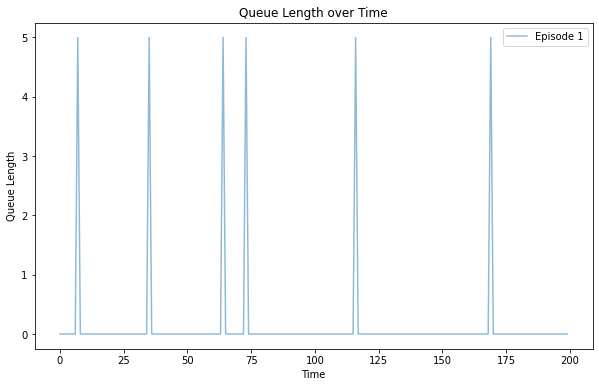

In [232]:
# Plot the queue length over time
plot_queue_length_over_time(queue_length_over_time)

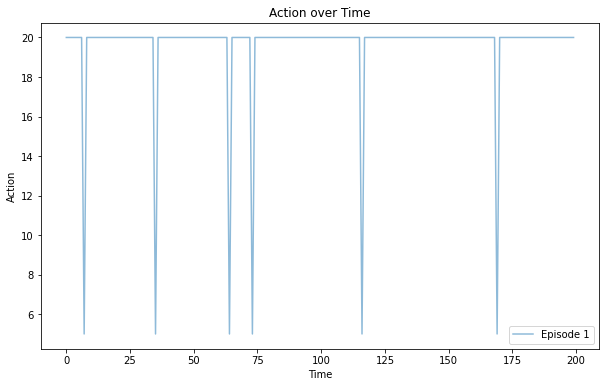

In [233]:
# Plot the queue length over time
plot_action_over_time(action_over_time)